## Titanic Data Analysis

The data set is provided by Kaggle (https://www.kaggle.com/c/titanic/data) it is important to note that the dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. So our working sample size covers 40% of the population, the total recorded passengers on board.

## Questions
Is there a noticable difference from the port in which passengers embarked from? If there is a disparity which passengers fared better and possibly why?


## The Data

In [320]:
#show plots inline
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the dataset, create dataframe
titanic_data = pd.read_csv('titanic-data.csv')

# A preview of the data we will be looking at
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



### Data Definitions

|Variable|	Definition|
|--------|------------|
|survival|	Survival|	
|pclass	|Ticket class|
|sex	|Sex	|
|Age	|Age in years|	
|sibsp	|# of siblings / spouses aboard the Titanic	|
|parch	|# of parents / children aboard the Titanic	|
|ticket	|Ticket number	|
|fare	|Passenger fare	|
|cabin	|Cabin number	|
|embarked|	Port of Embarkation	|

Key
* 0 = No, 1 = Yes
* 1 = 1st, 2 = 2nd, 3 = 3rd
* C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Data Wrangling

In [326]:
## Rename Embarked labels for better readability
titanic_data["Embarked"].replace({'C': "Cherbourg", "S":"Southampton", "Q":"Queenstown"}, inplace=True)


print("All of the below should be zero")
## Check for duplicate data
print(titanic_data.duplicated().sum())

## check for missing values in columns relavent to our question
survived_check = titanic_data.loc[(titanic_data["Survived"] != 1) &( titanic_data["Survived"] != 0)]
print(len(survived_check))
class_check = titanic_data.loc[(titanic_data["Pclass"] != 1) &( titanic_data["Pclass"] != 2) & (titanic_data["Pclass"] != 3)]
print(len(class_check))
fare_check = titanic_data.loc[(titanic_data["Fare"] == None) | (np.isnan(titanic_data["Fare"]))]
print(len(fare_check))
embarked_check = titanic_data.loc[titanic_data["Embarked"].isnull()]
print(len(embarked_check))


All of the below should be zero
0
0
0
0
2


Nothing to dedupe since there are no duplicate values.
However, note that the embarked column has two null rows which we need for our question so let's remove those two rows from the dataset.

In [327]:
titanic_data.dropna(subset=['Embarked'], how='all', inplace=True)
#Verify null embarked rows are removed
embarked_check = titanic_data.loc[titanic_data["Embarked"].isnull()]
print(len(embarked_check))


0


## Question: Is there a noticable difference from the port in which passengers embarked from? If there is a disparity which passengers fared better and possibly why?

To start lets group the data by the port embarked and investigate the result for any noticable patterns.

In [328]:
# Create seperate groups for each port
grouped_by_port = titanic_data.groupby("Embarked")


#get the means for relavent columns by port
means = grouped_by_port["Survived", "Pclass", "Fare"].mean()

print(means)
print("\n")
# good to know the size of the data we are working with
print("Total Size:" + str(grouped_by_port.size()))


             Survived    Pclass       Fare
Embarked                                  
Cherbourg    0.553571  1.886905  59.954144
Queenstown   0.389610  2.909091  13.276030
Southampton  0.336957  2.350932  27.079812


Total Size:Embarked
Cherbourg      168
Queenstown      77
Southampton    644
dtype: int64


In the first output we have the mean number of survivers, socio economic class, and fare paid. A mean survival rate closer to 1 implies there were more survivors than casualties. For passenger class we have passengers split into three categories: 1 Upper, 2 Middle, and 3 Lower. So a mean close to 3, like for Queenstown, would imply there are a lot more lower class passengers embarking from here than the other two classes. For fare this would be the average ticket price paid by passengers from each port. 

There are some interesting points about this data that we can look into a bit but first lets also note the
difference in the sizes of the ports passengers we are comparing. From this sample size it seems that more passengers embarked from Southampton than both Queenstown and Cherbourg combined.



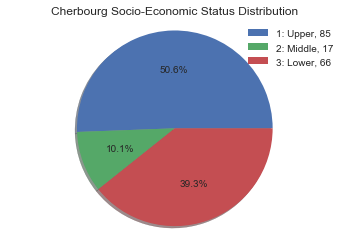

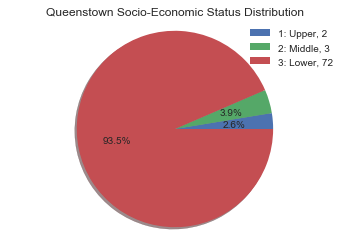

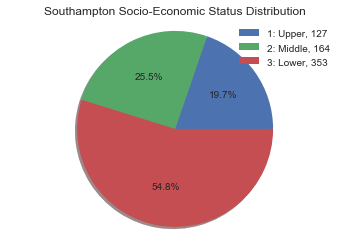

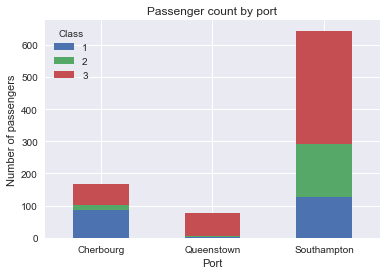

In [330]:
sizes = grouped_by_port.get_group("Cherbourg")["Pclass"].value_counts(sort=False,ascending=True)
labels = ["1: Upper", "2: Middle", "3: Lower"]
plt.pie(sizes, shadow=True, autopct='%1.1f%%' )
plt.axis("equal")
plt.title("Cherbourg Socio-Economic Status Distribution")
plt.legend( labels=['%s, %1.1i' % (l, s) for l, s in zip(labels, sizes)])
plt.show()

sizes = grouped_by_port.get_group("Queenstown")["Pclass"].value_counts(sort=False,ascending=True)
plt.pie(sizes, shadow=True, autopct='%1.1f%%' )
plt.axis("equal")
plt.legend( labels=['%s, %1.1i' % (l, s) for l, s in zip(labels, sizes)])
plt.title("Queenstown Socio-Economic Status Distribution")
plt.show()

sizes = grouped_by_port.get_group("Southampton")["Pclass"].value_counts(sort=False,ascending=True)
plt.pie(sizes, shadow=True, autopct='%1.1f%%' )
plt.axis("equal")
plt.title("Southampton Socio-Economic Status Distribution")
plt.legend( labels=['%s, %1i ' % (l, s) for l, s in zip(labels, sizes)])
plt.show()

# sns.barplot(x="Embarked", y="Pclass", data=titanic_data)
table = pd.crosstab(titanic_data["Embarked"], titanic_data["Pclass"])
ax = table.plot.bar(stacked=True)
ax.set(title="Passenger count by port", xlabel="Port", ylabel="Number of passengers")
#Fix rotation in the x-ticks
ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=0)
# Legend title
ax.legend(title="Class")



The first chart above compares the the size of each socio economic class embarking from each port.
Note that the majority of passengers from both Queenstown and Southampton are class 3, lower, while for
Cherbourg we have a majority of class 1, upper.

The second chart shows the same data but combined for each port. Again we see that passengers from Cherbourg seem to be more so upper than the others.


### Follow up question: How did passengers from Cherbourg survival rate compare with that of the other two ports?

From the data we can see passengers from Cherbourg were of a higher class but were they also more likely to 
survive than the other two ports, if so is this only because they have a higher count of upper class passengers?

It would not be a surprise if upper class passengers have a higher survival rate than those of middle and lower based of the ship deck plans we can see that upper class passengers are roomed highest.
https://www.encyclopedia-titanica.org/titanic-deckplans/

Survival rate among classes
Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


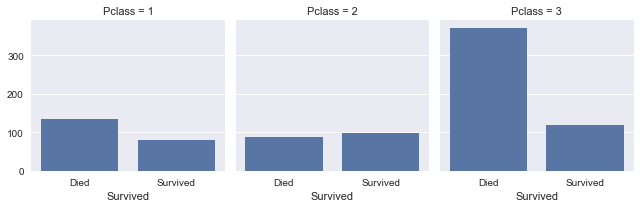

In [331]:
# Comparison of surival rates based on socio economic status.
grouped_by_class = titanic_data.groupby("Pclass")

#get the means for relavent columns by port
means = grouped_by_class["Survived"].mean()
print("Survival rate among classes")
print(means)

renamed = titanic_data.copy()
renamed['Survived'].replace({0:'Died', 1:'Survived'}, inplace=True)

# graph survival status based on count
g = sns.FacetGrid(renamed, col='Pclass')
g.map(sns.countplot, "Survived")
sns.plt.show()

As expected we can see from the above we can see that first class passengers seemed to have the highest chance of surviving. Now lets see if them embarking from Cherboug made a difference to this or not?

Embarked
Cherbourg      59
Queenstown      1
Southampton    74
Name: Survived, dtype: int64
Embarked
Cherbourg      0.351190
Queenstown     0.012987
Southampton    0.114907
dtype: float64


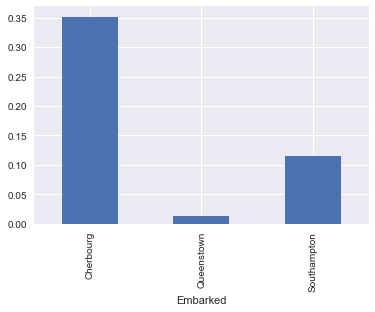

In [332]:
#query only the surviving passengers and first class passengers.
only_survived_first_class = titanic_data.loc[(titanic_data["Survived"] == 1) & (titanic_data["Pclass"] == 1)]

#groubby port again
only_survived_first_class_grouped_by_embarked = only_survived_first_class.groupby("Embarked")

#count of these results
print(only_survived_first_class_grouped_by_embarked["Survived"].count())

#Get probability of survival for each port
survival_probability_by_embarked = only_survived_first_class_grouped_by_embarked['Survived'].count().div(grouped_by_port.size())
print(survival_probability_by_embarked)

survival_probability_by_embarked.plot.bar()


From the above we see that sample data indicates that the first class passengers from Cherbourg had a higher survival rate than the first class passengers from the other two ports.

It is true that there are more survivers from Southampton but recall that total passengers from each port are not identical so to compare we can look at the ratio of survivors to total passengers in each port.

## Conclusion

The data indicates that there is a noticable difference between the passengers that departed from 3 ports. In that, the passengers embarking from Cherboug not only consisted of more first class passengers and had a higher chance of survival.

Note again that the data provided was not the entire population of Titanic passengers. 

Further questions:
    - Reasons why first class passengers from Cherbourg had a higher survival rate?
        - Possibly due to incomplete data.
        - The cabins boarded by the first class passengers who embarked from Cherbourg were closer to life boats.
        - The cabins boarded by the first class passengers who embarked from Cherbourg were notified earlier.
       
     